In [8]:
import pandas as pd
import alphalens as al
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


kline_data = pd.read_csv('kline_data_2021-2022.csv', index_col=False)
kline_data['date'] = kline_data['date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
kline_data.set_index(['asset','date'])

price_data=(kline_data[['asset', 'close_price', 'date']].pivot_table(values='close_price', index='date', columns='asset')/10000).sort_index()

In [13]:
factor_data=pd.read_csv('icmean_date_asset.csv')
factor_data['date'] = factor_data['date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

In [14]:
factor_data = factor_data.set_index(['date', 'asset'])['synthesized_factor']
factor_data

date        asset    
2021-01-06  300612.SZ   -0.000567
            600526.SH    0.000131
            600527.SH   -0.005436
            600528.SH   -0.008112
            600529.SH   -0.003674
                           ...   
2021-12-31  600490.SH    0.010056
            600489.SH    0.008573
            600488.SH    0.003292
            600428.SH   -0.000718
            300562.SZ   -0.012079
Name: synthesized_factor, Length: 941190, dtype: float64

In [15]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
                                              factor_data,
                                              price_data,
                                              groupby=None,
                                              binning_by_group=False,
                                              quantiles=5,
                                              bins=None,
                                              periods=(1, 5, 10),
                                              filter_zscore=20,
                                              groupby_labels=None,
                                              max_loss=0.35,
                                              zero_aware=False)

Dropped 4.1% entries from factor data: 4.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [16]:
factor_data

1D        5D       10D    factor  factor_quantile
date       asset                                                             
2021-01-06 300612.SZ -0.082017 -0.183902 -0.094753 -0.000567                3
           600526.SH -0.045351 -0.077098 -0.045351  0.000131                3
           600527.SH -0.028881 -0.054152 -0.032491 -0.005436                1
           600528.SH -0.025192  0.015334  0.001095 -0.008112                1
           600529.SH -0.030355 -0.047147 -0.040904 -0.003674                2
...                        ...       ...       ...       ...              ...
2021-12-17 003027.SZ  0.009013 -0.013519  0.002048  0.021848                5
           003028.SZ  0.010041 -0.028688  0.001673  0.010946                5
           003029.SZ -0.002463 -0.022167  0.036946  0.018437                5
           003016.SZ  0.002865 -0.008596 -0.004776 -0.001110                3
           605177.SH  0.002708  0.039458  0.069246 -0.004997                2

[902149 rows x 5 columns]

## IC分析

Information Analysis


,1D,5D,10D
IC Mean,0.011,0.012,0.014
IC Std.,0.052,0.045,0.044
Risk-Adjusted IC,0.218,0.263,0.317
t-stat(IC),3.318,4.002,4.820
p-value(IC),0.001,0.000,0.000
IC Skew,-0.210,0.101,0.064
IC Kurtosis,0.569,0.695,0.175


<Figure size 640x480 with 0 Axes>

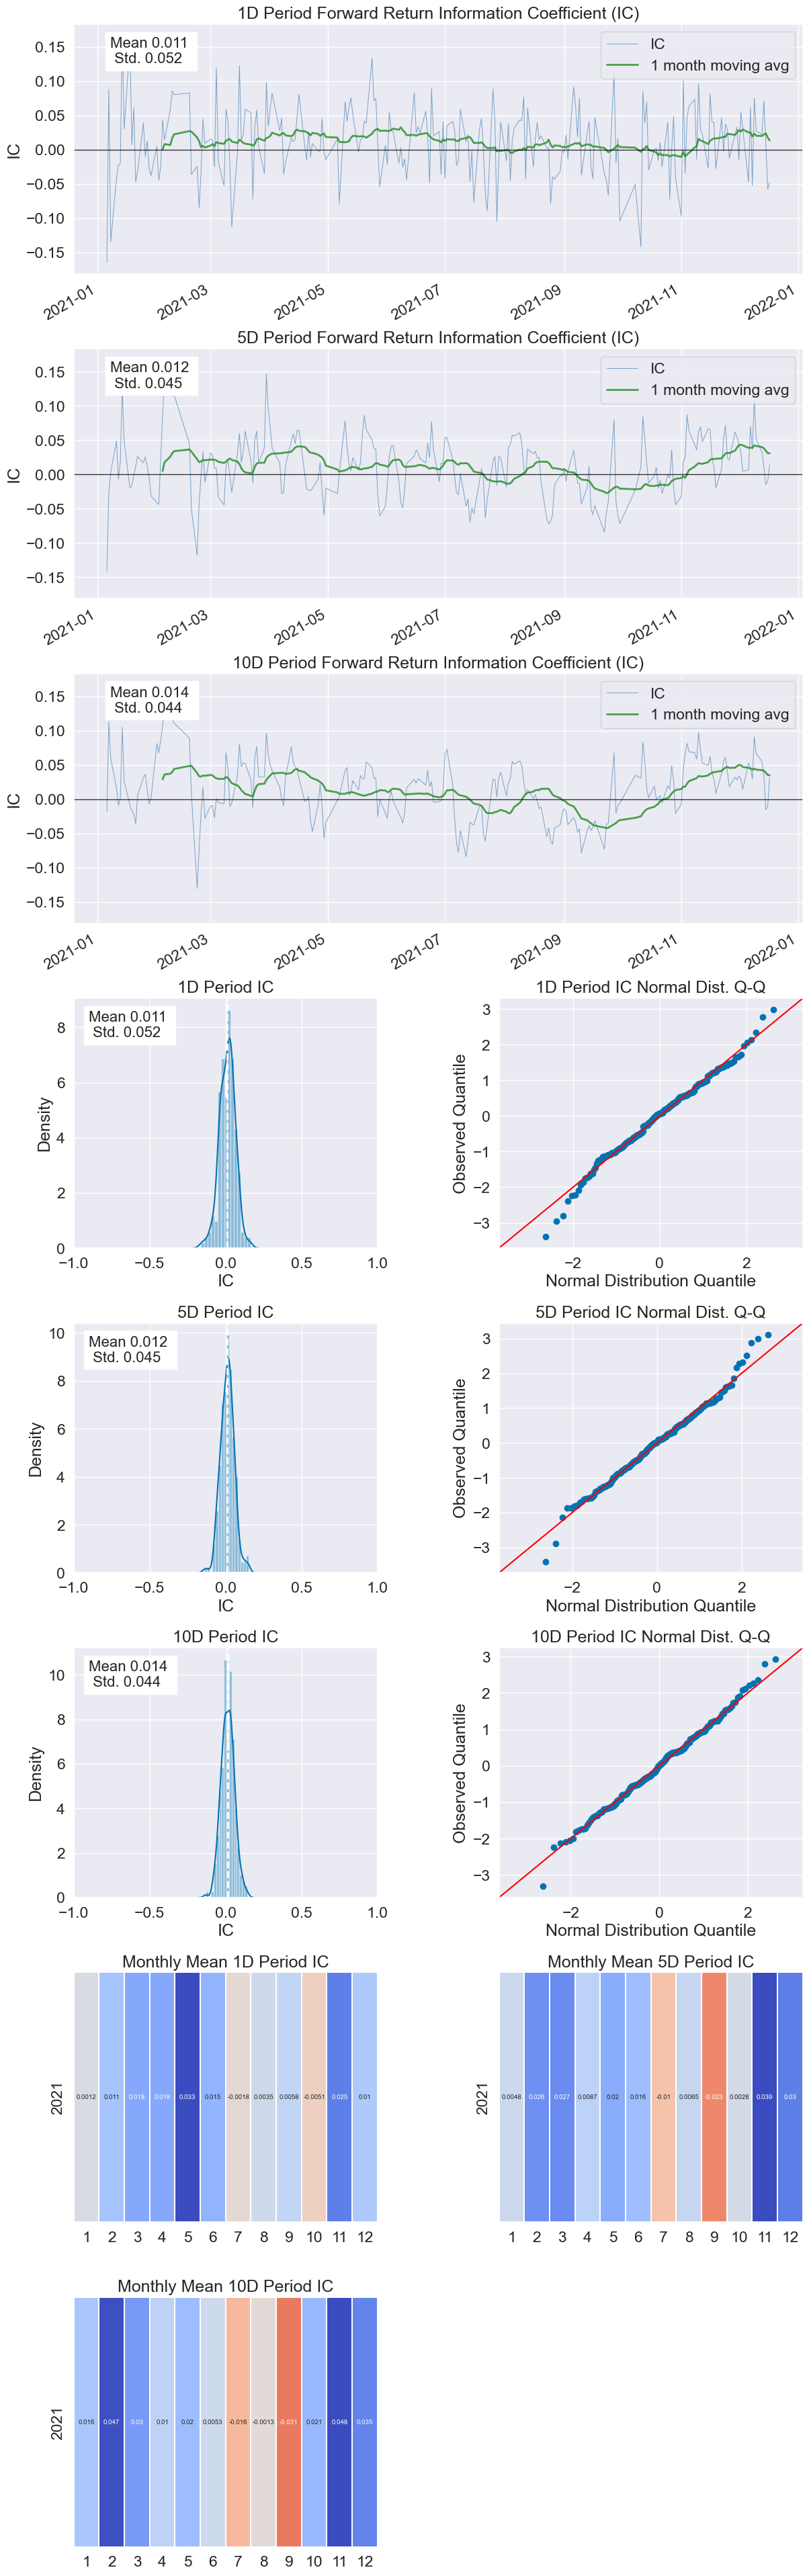

In [17]:
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

## 收益率分析

Returns Analysis


,1D,5D,10D
Ann. alpha,-0.046,-0.012,-0.001
beta,0.049,0.062,0.044
Mean Period Wise Return Top Quantile (bps),5.675,8.962,9.625
Mean Period Wise Return Bottom Quantile (bps),8.808,8.431,8.604
Mean Period Wise Spread (bps),-3.132,0.404,0.944


<Figure size 640x480 with 0 Axes>

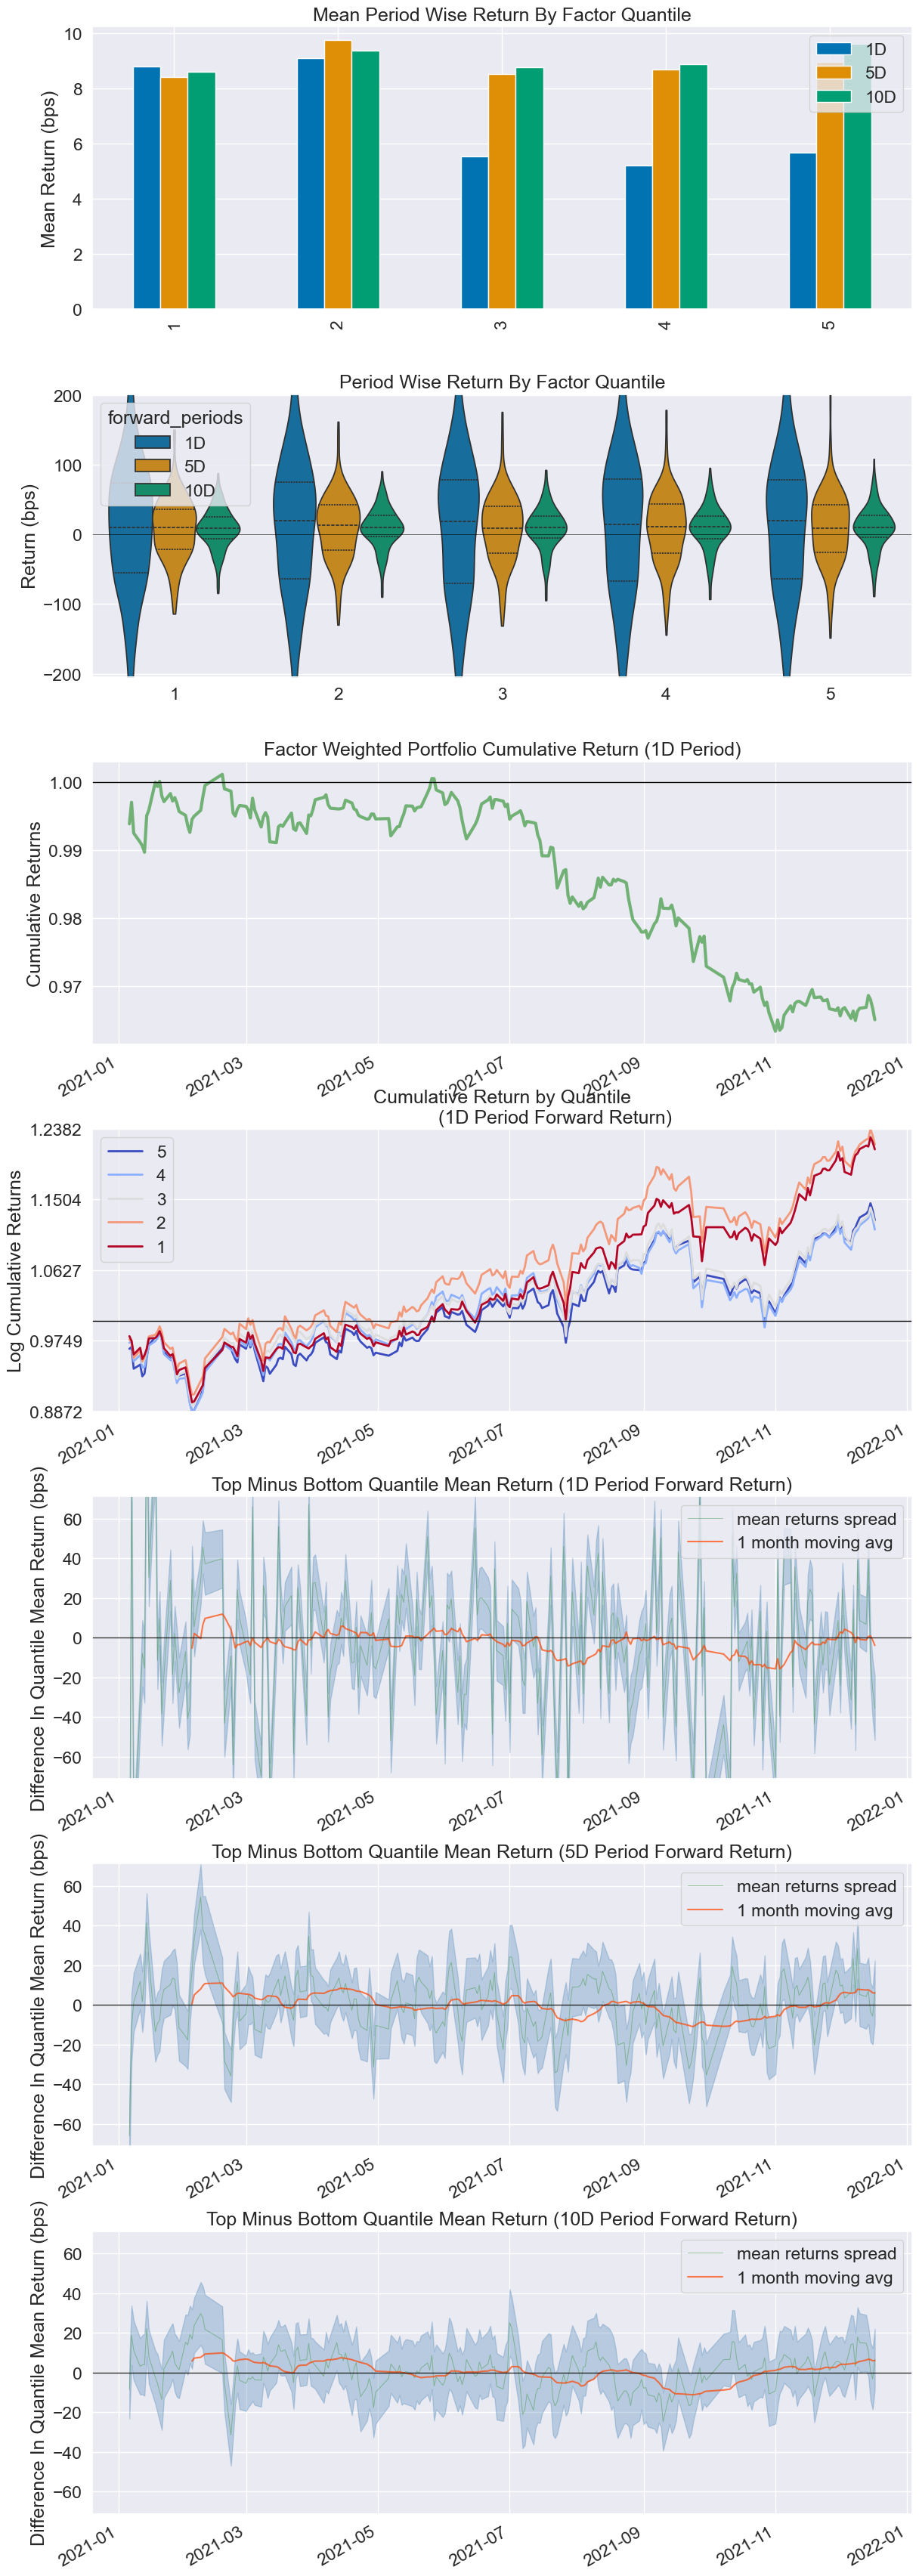

In [18]:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False)

## 换手率分析

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.387,0.774,0.790
Quantile 2 Mean Turnover,0.642,0.793,0.797
Quantile 3 Mean Turnover,0.673,0.798,0.801
Quantile 4 Mean Turnover,0.646,0.790,0.797
Quantile 5 Mean Turnover,0.424,0.774,0.788


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.708,0.067,0.027


<Figure size 640x480 with 0 Axes>

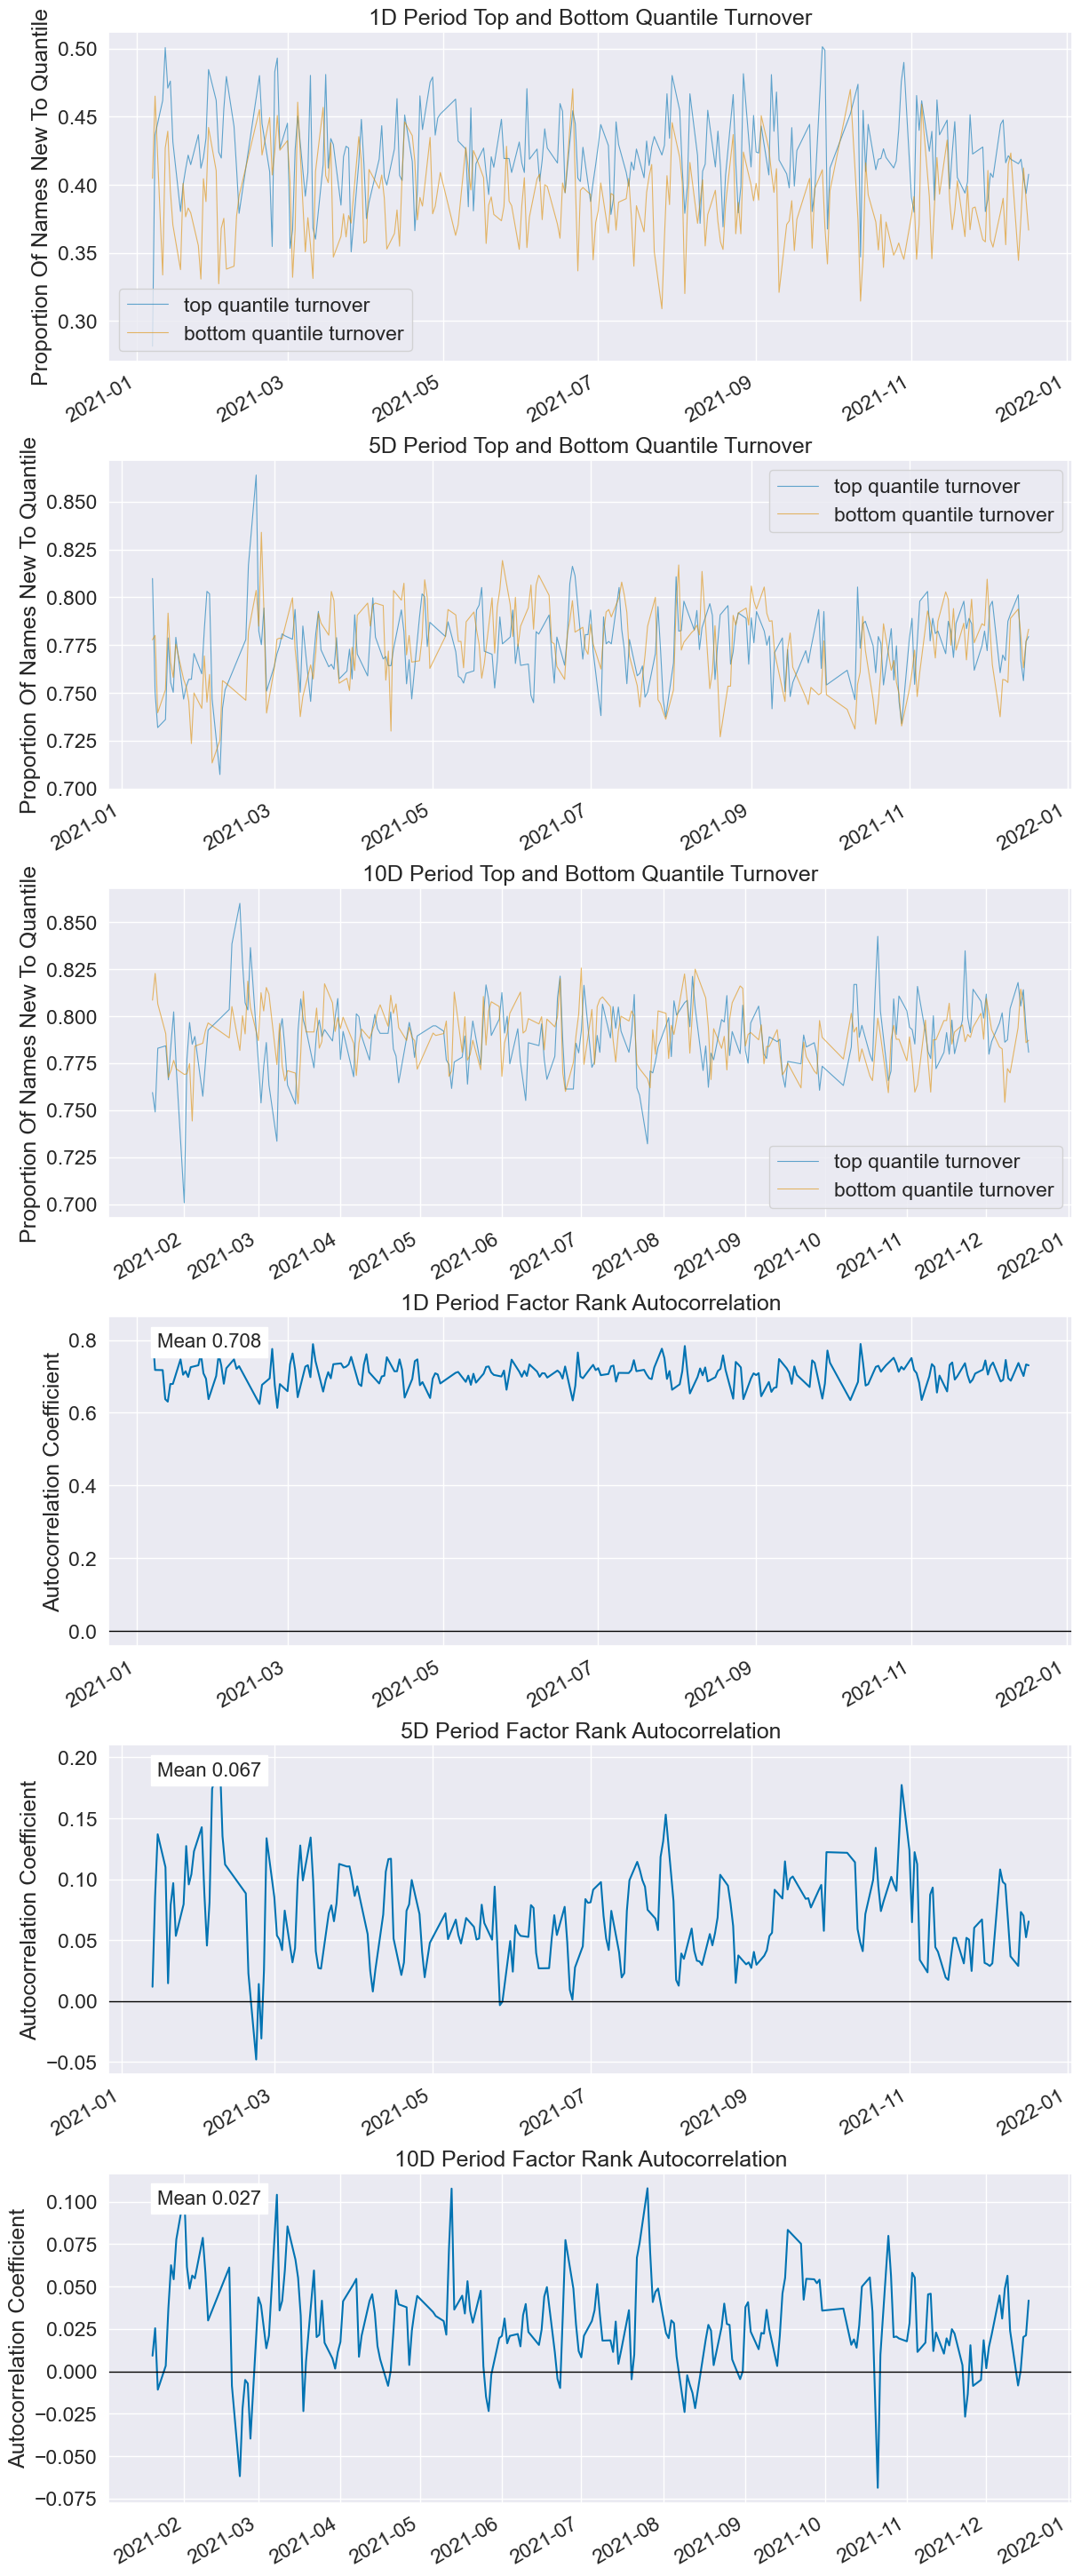

In [19]:
al.tears.create_turnover_tear_sheet(factor_data,turnover_periods=['1D','5D','10D'])